1001
1001


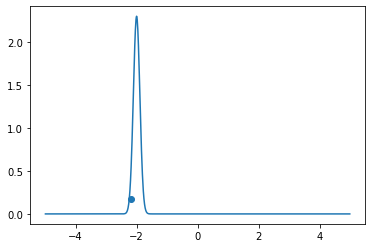

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#making some arbitrary wavefunction defined in the (-6.5,6.5 interval)
#all I want to do is to test a specific wavefunction and compute tunneling probability
#with a potential barrier with width .5
m=1
hbar = 1
xmin = -5
xmax = 5
N=1000
x=np.linspace(xmin,xmax,N+1)
dx = x[1]-x[0]
p=40
V0=p**2/(2*m)
sig=.15
x0=2
print(len(x))
V=0*x
print(len(V))
## makes the potential array such that it is 0 everywhere but the barrier
for i in range(len(V)):
    if x[i]>0 and x[i]<.5:
        V[i]=V0
#plt.plot(x,V)

Psi0 = np.exp( -(x[1:-1]+x0)**2/sig**2)*np.exp(1j*p*(x[1:-1]+x0)) ##this works for any gaussian wave packet we can use any of this form so long as we normalize (this is for future)
A = np.sum(np.abs(Psi0)**2*dx) #normalizing the function
Psi0 = Psi0/np.sqrt(A)
plt.plot(x[1:-1],np.abs(Psi0))
test= np.exp( -(-2.2+x0)**2/sig**2)*np.exp(1j*p*(-2.2+x0))
B=np.sum(np.abs(Psi0)**2*dx)
test=test/np.sqrt(B)
plt.scatter(-2.2,np.abs(test))

In [2]:
H = (hbar**2/(m*dx**2))*np.diag(np.ones(N-1))+V[1:-1]*np.diag(np.ones(N-1))+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),1)+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),-1)
print(H.shape)

E,psi = np.linalg.eigh(H) ##we can use this to solve this eigenvalue problem since the Hamiltonian is a Hermitian
#matrix in that it yields real Eigen-energies for the particle
print(len(E))
#print(psi) #we know that what we are after are the probablistic weights of each eigenvector (given by integral)
#the innerproduct of these eigenvalues with the psi function is equal to C_n(weights) 
psi=psi.T #transpose
A=np.sum(np.abs(psi[0])**2*dx) 
psi = psi/np.sqrt(A)


(999, 999)
999


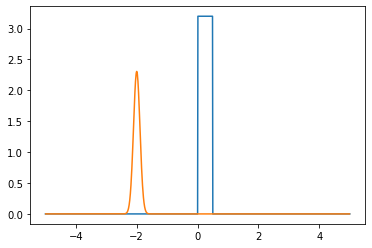

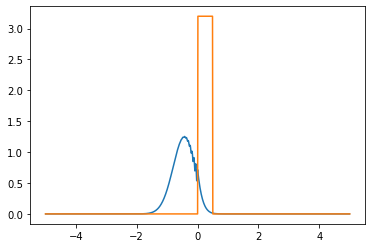

In [26]:
plt.plot(x,.004*V)
c=0*Psi0
for i in range(len(c)):
    c[i]= np.sum(np.conj(psi[i])*Psi0*dx)
#print(c[1],c[2],c[3])

t=0
dt=.001
Psi=0*psi[0]
for i in range(len(c)):
    Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*t/hbar)
plt.plot(x[1:-1],np.abs(Psi))
plt.show()
t=t+40*dt
Psi=0*psi[0]
for i in range(len(c)):
    Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*t/hbar)
plt.plot(x[1:-1],np.abs(Psi))
plt.plot(x,.004*V)
plt.show()
def midpoint(x, y): #going to refine this later for more divisions N
    n = len(x)
    integral = 0.0

    for i in range(1, n):
        midpoint = (x[i-1] + x[i]) / 2
        integral += y[i] * (x[i] - x[i-1])

    return integral
#midpoint(x[1:-1],np.abs(Psi)**2)


500
51
450
100
100
100


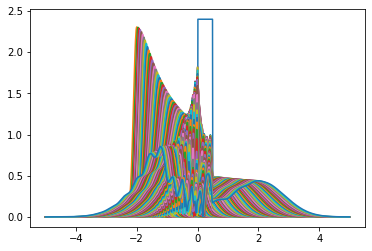

In [28]:
integrals1=[]
integrals2=[]
integrals3=[]
plt.plot(x,.003*V)
times=np.linspace(0,.1,100)
first_interval=[]
second_interval=[]
third_interval=[]
for val in x:
    if val < 0:
        first_interval.append(val)
for val2 in x:
    if val2 >= 0 and val2<=.5:
        second_interval.append(val2)
for val3 in x:
    if val3 > .5:
        third_interval.append(val3)    
print(len(first_interval))
print(len(second_interval))        
print(len(third_interval))        
for t in times:
    Psi=0*psi[0]
    for i in range(len(c)):
        Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*t/hbar)
    plt.plot(x[1:-1],np.abs(Psi))
    integrals1.append(midpoint(first_interval,np.abs(Psi)**2))
    integrals2.append(midpoint(second_interval,np.abs(Psi)**2))
    integrals3.append(midpoint(third_interval,np.abs(Psi)**2))
print(len(integrals1))
print(len(integrals3))
print(len(integrals2))
#plt.plot(times,integrals1)
#need to figure out a way to address errors

In [30]:
import numpy as np
import matplotlib.pyplot as plt
def midpoint2(x, y): #going to refine this later for more divisions N
    n = len(x)
    integral = 0.0

    for i in range(1, n):
        midpoint = (x[i-1] + x[i]) / 2
        integral += y[i] * (x[i] - x[i-1])

    return integral
xmin = -7
xmax = 7
N=1000
x=np.linspace(xmin,xmax,N+1)
def wavefunction_solver(width,V0):
    m=1
    hbar = 1
    #xmin = -5
    #xmax = 5
    N=1000
    x=np.linspace(xmin,xmax,N+1)
    dx = x[1]-x[0]
    p=40
    sig=.15
    x0=2
    V=0*x
## makes the potential array such that it is 0 everywhere but the barrier
    for i in range(len(V)):
        if x[i]>(-width/2) and x[i]<(width/2):
            V[i]=V0
    #plt.plot(x,V*.003)
    Psi0 = np.exp( -(x[1:-1]+x0)**2/sig**2)*np.exp(1j*p*(x[1:-1]+x0)) ##this works for any gaussian wave packet
    A = np.sum(np.abs(Psi0)**2*dx) #normalizing the function
    Psi0 = Psi0/np.sqrt(A)
    #plt.plot(x[1:-1],np.abs(Psi0))
    H = (hbar**2/(m*dx**2))*np.diag(np.ones(N-1))+V[1:-1]*np.diag(np.ones(N-1))+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),1)+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),-1)
    #print(H.shape)

    E,psi = np.linalg.eigh(H)  
    psi=psi.T #transpose
    A=np.sum(np.abs(psi[0])**2*dx) 
    psi = psi/np.sqrt(A)
    #print(midpoint2(x[1:-1],psi[0]**2))
    c=0*Psi0
    for i in range(len(c)):
        c[i]= np.sum(np.conj(psi[i])*Psi0*dx)
    return regions(width,V,psi,E,hbar,c)
#wavefunction_solver(4,2.4)
wavefunction_solver(.5,800)  

0.32733370684859264

In [29]:
def regions(width,V,psi,E,hbar,c):
    first_interval=[]
    second_interval=[]
    third_interval=[]
    for val in x[1:-1]:
        if val < (-width/2):
            first_interval.append(val)
    for val2 in x[1:-1]:
        if val2 >= (-width/2) and val2<= (width/2):
            second_interval.append(val2)
    for val3 in x[1:-1]:
        if val3 > (width/2):
            third_interval.append(val3)
    dt=.001
    xcal=x[1:-1]
    i1=len(third_interval)
    i2=len(second_interval)
    i3=len(first_interval)
    usecase=xcal[998-i1:998]
    usecase2=xcal[998-i1-i2:998-i1]
    usecase3=xcal[0:998-i1-i2]
    steps=np.linspace(0,150,500)
    t=0
    region_one=[]
    region_two=[]
    region_three=[]
    ts=[]
    for graph,step in enumerate(steps):
        t=t+step*dt
        ts.append(t)
        Psi=0*psi[0]
        for i in range(len(c)):
            Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*t/hbar)
        arg=(np.abs(Psi)**2)[998-i1:998]
        arg2=(np.abs(Psi)**2)[998-i1-i2:998-i1]
        arg3=(np.abs(Psi)**2)[0:998-i1-i2]
        region_one.append(midpoint2(usecase3,arg3))
        region_two.append(midpoint2(usecase2,arg2))
        region_three.append(midpoint2(usecase,arg))
    min1=region_one[0]
    min2=region_two[0]
    min3=region_three[0]
    for el in region_one:
        if el < min1:
            min1 = el
    for el in region_two:
        if el > min2:
            min2 = el
    for el in region_three:
        if el > min3:
            min3 = el
#print(min1)
#print(min2)
#print(min3)
    for ind,els in enumerate(region_three):
        if els == min3:
            #print(els)
            ans=els
            #print(steps[ind])
            #print(region_one[ind])
            #print(region_two[ind])
            tcheck=steps[ind]
            Psi=0*psi[0]
            for i in range(len(c)):
                Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*ts[ind]/hbar)
            #plt.figure()
            #plt.plot(x[1:-1],np.abs(Psi)**2)
            #plt.plot(x,V*.003)
    #fig,axs=plt.subplots(3,1)
    #axs[0].plot(ts,region_three)
    #axs[0].set_xlabel('Time s')
    #axs[0].set_ylabel('Probability')
    #axs[0].set_title('Region 3')
    #axs[1].plot(ts,region_two)
    #axs[1].set_xlabel('Time s')
    #axs[1].set_ylabel('Probability')
    #axs[1].set_title('Region 2')
    #axs[2].plot(ts,region_one)
    #axs[2].set_xlabel('Time s')
    #axs[2].set_ylabel('Probability')
    #axs[2].set_title('Region 1')
    #fig.tight_layout() 
    return ans
    #Psi=0*psi[0]
    #for i in range(len(c)):
        #Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*.21/hbar)
    #plt.figure()
    #plt.plot(x[1:-1],np.abs(Psi)**2)
    #plt.plot(x,V*.003)

In [31]:
Vs=np.linspace(600,1200,10)
widths=np.linspace(.1,3.5,2)
transmission=[]

for v in Vs:
    for wid in widths:
        transmission.append(wavefunction_solver(wid,v) )

In [35]:
import numpy as np
import matplotlib.pyplot as plt
def midpoint2(x, y): #going to refine this later for more divisions N
    n = len(x)
    integral = 0.0

    for i in range(1, n):
        midpoint = (x[i-1] + x[i]) / 2
        integral += y[i] * (x[i] - x[i-1])

    return integral
xmin = -7
xmax = 7
N=1000
x=np.linspace(xmin,xmax,N+1)
def wavefunction_solver2(width,V0,Psi0):
    m=1
    hbar = 1
    #xmin = -5
    #xmax = 5
    N=1000
    x=np.linspace(xmin,xmax,N+1)
    dx = x[1]-x[0]
    p=40
    sig=.15
    x0=2
    V=0*x
## makes the potential array such that it is 0 everywhere but the barrier
    for i in range(len(V)):
        if x[i]>(-width/2) and x[i]<(width/2):
            V[i]=V0
    plt.plot(x,V*.1)
    #Psi0 = np.exp( -(x[1:-1]+x0)**2/sig**2) ##this works for any gaussian wave packet
    A = np.sum(np.abs(Psi0)**2*dx) #normalizing the function
    Psi0 = Psi0/np.sqrt(A)
    plt.plot(x[1:-1],np.abs(Psi0))
    H = (hbar**2/(m*dx**2))*np.diag(np.ones(N-1))+V[1:-1]*np.diag(np.ones(N-1))+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),1)+ (-hbar**2/(2*m*dx**2))*np.diag(np.ones(N-2),-1)
    #print(H.shape)

    E,psi = np.linalg.eigh(H)  
    psi=psi.T #transpose
    A=np.sum(np.abs(psi[0])**2*dx) 
    psi = psi/np.sqrt(A)
    #print(midpoint2(x[1:-1],psi[0]**2))
    c=0*Psi0
    for i in range(len(c)):
        c[i]= np.sum(np.conj(psi[i])*Psi0*dx)
    return regions2(width,V,psi,E,hbar,c)
#wavefunction_solver(4,2.4)
#wavefunction_solver(.5,40)  

In [34]:
def regions2(width,V,psi,E,hbar,c):
    first_interval=[]
    second_interval=[]
    third_interval=[]
    for val in x[1:-1]:
        if val < (-width/2):
            first_interval.append(val)
    for val2 in x[1:-1]:
        if val2 >= (-width/2) and val2<= (width/2):
            second_interval.append(val2)
    for val3 in x[1:-1]:
        if val3 > (width/2):
            third_interval.append(val3)
    dt=.001
    xcal=x[1:-1]
    i1=len(third_interval)
    i2=len(second_interval)
    i3=len(first_interval)
    usecase=xcal[998-i1:998]
    usecase2=xcal[998-i1-i2:998-i1]
    usecase3=xcal[0:998-i1-i2]
    steps=np.linspace(0,150,500)
    t=0
    region_one=[]
    region_two=[]
    region_three=[]
    ts=[]
    for graph,step in enumerate(steps):
        t=t+step*dt
        ts.append(t)
        Psi=0*psi[0]
        for i in range(len(c)):
            Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*t/hbar)
        arg=(np.abs(Psi)**2)[998-i1:998]
        arg2=(np.abs(Psi)**2)[998-i1-i2:998-i1]
        arg3=(np.abs(Psi)**2)[0:998-i1-i2]
        region_one.append(midpoint2(usecase3,arg3))
        region_two.append(midpoint2(usecase2,arg2))
        region_three.append(midpoint2(usecase,arg))
    min1=region_one[0]
    min2=region_two[0]
    min3=region_three[0]
    for el in region_one:
        if el < min1:
            min1 = el
    for el in region_two:
        if el > min2:
            min2 = el
    for el in region_three:
        if el > min3:
            min3 = el
#print(min1)
#print(min2)
#print(min3)
    for ind,els in enumerate(region_three):
        if els == min3:
            #print(els)
            ans=els
            #print(steps[ind])
            #print(region_one[ind])
            #print(region_two[ind])
            tcheck=steps[ind]
            Psi=0*psi[0]
            for i in range(len(c)):
                Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*ts[ind]/hbar)
            plt.figure()
            plt.plot(x[1:-1],np.abs(Psi)**2)
            plt.plot(x,V*.1)
    #fig,axs=plt.subplots(3,1)
    #axs[0].plot(ts,region_three)
    #axs[0].set_xlabel('Time s')
    #axs[0].set_ylabel('Probability')
    #axs[0].set_title('Region 3')
    #axs[1].plot(ts,region_two)
    #axs[1].set_xlabel('Time s')
    #axs[1].set_ylabel('Probability')
    #axs[1].set_title('Region 2')
    #axs[2].plot(ts,region_one)
    #axs[2].set_xlabel('Time s')
    #axs[2].set_ylabel('Probability')
    #axs[2].set_title('Region 1')
    #fig.tight_layout() 
    return ans
    #Psi=0*psi[0]
    #for i in range(len(c)):
        #Psi = Psi + c[i]*psi[i]*np.exp(-1j*E[i]*.21/hbar)
    #plt.figure()
    #plt.plot(x[1:-1],np.abs(Psi)**2)
    #plt.plot(x,V*.003)

0.051998877820596597

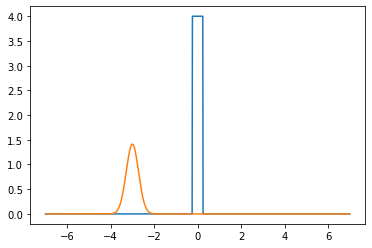

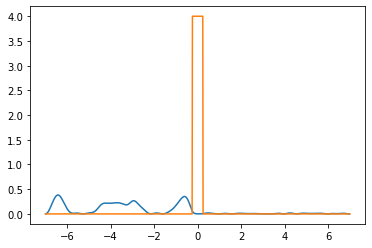

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def distgen(sig,x0):
    N=1000
    x=np.linspace(xmin,xmax,N+1)
    Psi0 = np.exp( -(x[1:-1]+x0)**2/sig**2)
    return Psi0

#distgen(.4,3)
wavefunction_solver2(.5,40,distgen(.4,3))

0.11424884224577922

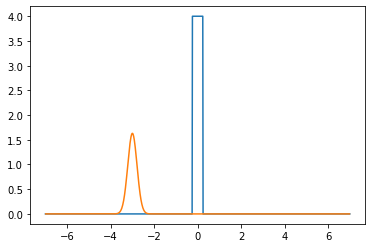

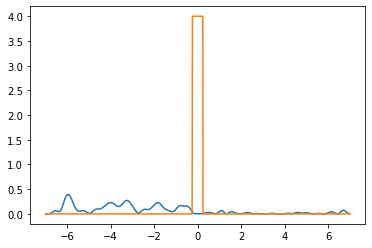

In [39]:
wavefunction_solver2(.5,40,distgen(.3,3))

0.3916962543642672

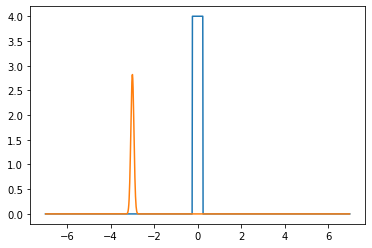

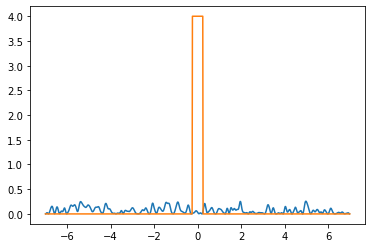

In [40]:
wavefunction_solver2(.5,40,distgen(.1,3))